# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness);
- [данные по фильмам и сериалам Netflix](https://www.kaggle.com/shivamb/netflix-shows).

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
* не менее двух визуализаций должны быть интерактивными.

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

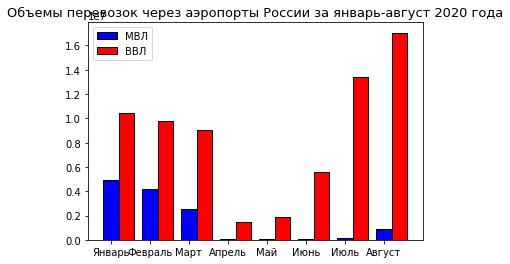

,Год,Период,МВЛ,ВВЛ
0,2020,Январь,4929170,10467763
1,2020,Февраль,4166346,9804041
2,2020,Март,2505984,9062067
3,2020,Апрель,30421,1439595
4,2020,Май,48965,1844599
5,2020,Июнь,69121,5590546
6,2020,Июль,110544,13404769
7,2020,Август,911567,17052426


In [141]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

df_av_trans = pd.read_csv('avia_trans_volume.csv')
df_airp_pas = pd.read_csv('airports_passengers.csv')

df_av_trans[['МВЛ','ВВЛ']]

plt.title('A Multiseries Bar Chart', fontsize=20)
bw = 0.4
x = pd.Series(range(0, 8))
plt.bar(x,    df_av_trans['МВЛ'], bw, color = 'blue', edgecolor = 'black', label = 'МВЛ')
plt.bar(x+bw, df_av_trans['ВВЛ'], bw, color = 'red',  edgecolor = 'black', label = 'ВВЛ')
plt.title('Объемы перевозок через аэропорты России за январь-август 2020 года', fontsize=13)
plt.xticks(x, df_av_trans['Период'])
plt.legend(loc=2)

plt.show()
df_av_trans

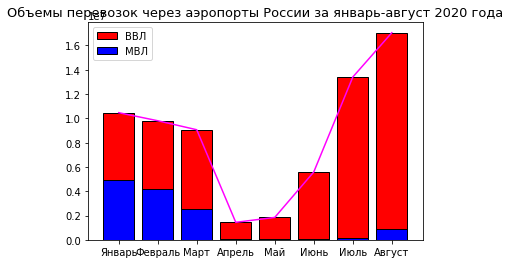

In [52]:
plt.bar(x, df_av_trans['ВВЛ'], color = 'red',  edgecolor = 'black', label = 'ВВЛ')
plt.bar(x, df_av_trans['МВЛ'], color = 'blue', edgecolor = 'black', label = 'МВЛ')
plt.title('Объемы перевозок через аэропорты России за январь-август 2020 года', fontsize=13)
plt.xticks(x, df_av_trans['Период'])
plt.legend(loc=2)

plt.plot(df_av_trans['ВВЛ'], color = 'magenta', label = 'ВВЛ')
plt.show()


В апреле 2020 года произошло падение объемов перевозок на 90%, по сравнению с январем 2020г. - с 15 до 1.5 млн пассажиров.
С марта 2020г. наблюдается заметное падение международных авиаперевозок в связи с закрытием большинства зарубежных направлений из-за пандемии коронавируса.

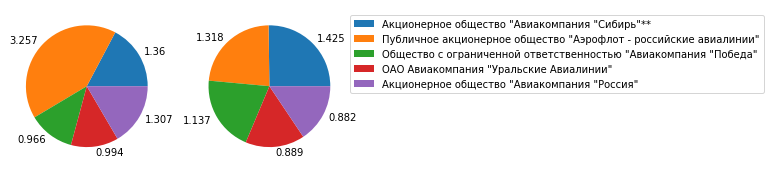

In [127]:
plt.title('Объемы перевозок через аэропорты России за январь-август 2020 года', fontsize=13)

df_air_comp = pd.read_csv('air_comp.csv')
df_air_comp['2019_Сентябрь'] = round(df_air_comp['2019_Сентябрь']/1000000, 3)
df_air_comp['2020_Сентябрь'] = round(df_air_comp['2020_Сентябрь']/1000000, 3)

plt.subplot(1, 2, 1)
plt.pie(df_air_comp['2019_Сентябрь'], labels=df_air_comp['2019_Сентябрь'])
plt.subplot(1, 2, 2)
plt.pie(df_air_comp['2020_Сентябрь'], labels=df_air_comp['2020_Сентябрь'])
plt.legend(df_air_comp['Авиапредприятие'], bbox_to_anchor=(1, 1))

plt.show()

«Аэрофлот», являвшийся лидером по объему пассажиропотока, уступил первое место S7. В сентябре 2020 года «Аэрофлот» обслужил 132 тыс. человек, это по прежнему меньше, чем S7.
Смена лидера рейтинга связана с тем, что внутренний рынок падал медленнее, чем международный. 
А S7 больше ориентирована на внутренний рынок, чем «Аэрофлот», для которого международные перевозки являются основными.

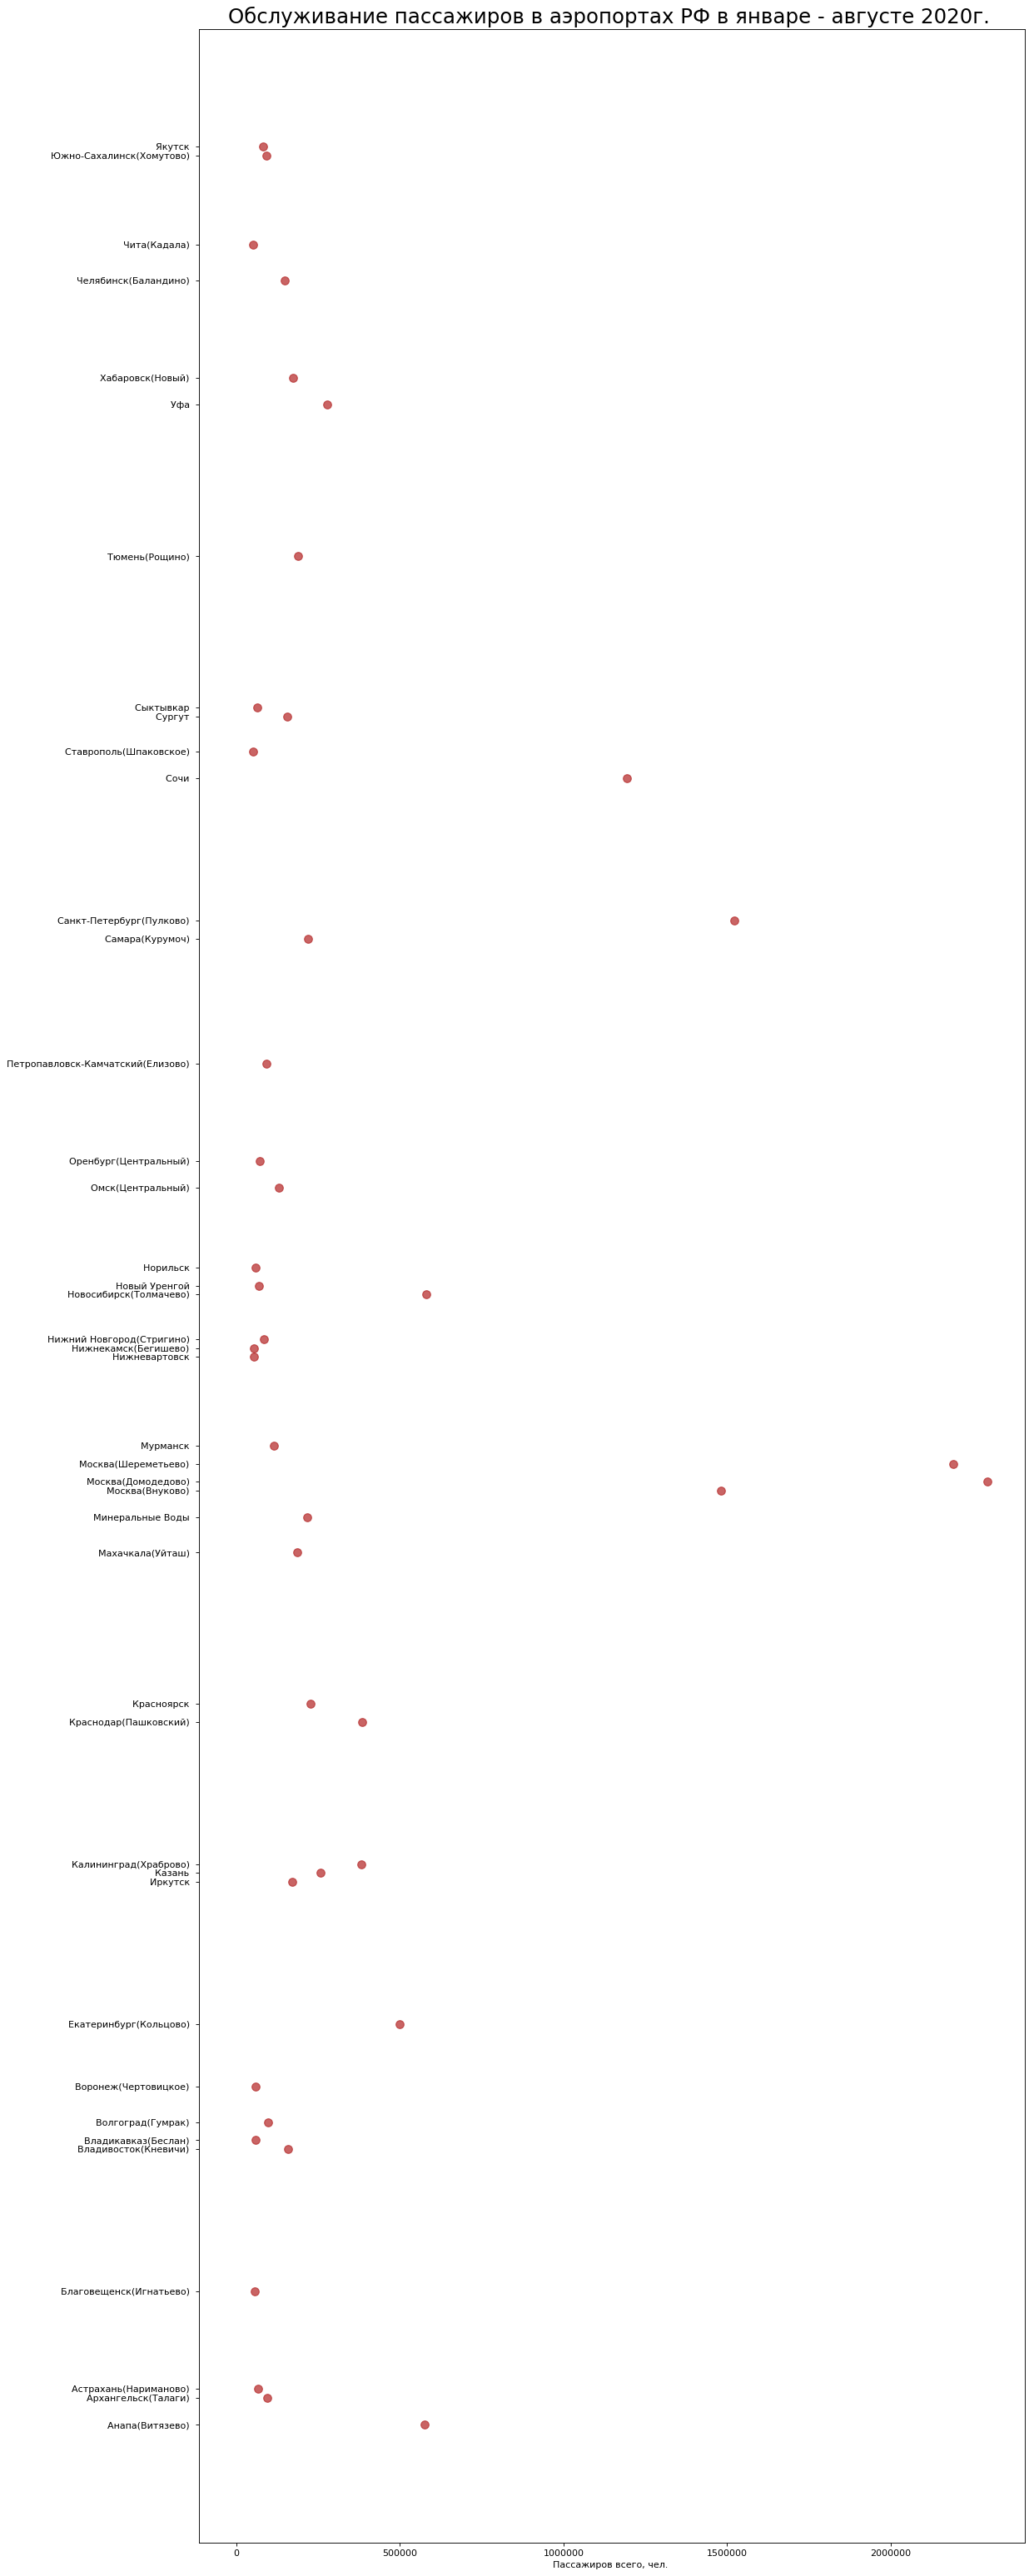

In [140]:
df_airp_pas = pd.read_csv('airports_passengers.csv')
df_airp_pas_ag = df_airp_pas[['Аэропорт','Август']]
df = df_airp_pas_ag.query('Август > 50000') 

#plt.figure(figsize=(10,500))


# Draw plot
ax = plt.subplots(figsize=(16,50), dpi= 80)[1]
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df['Август'], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Обслуживание пассажиров в аэропортах РФ в январе - августе 2020г. ', fontdict={'size':22})
ax.set_xlabel('Пассажиров всего, чел. ')
ax.set_yticks(df.index)
ax.set_yticklabels(df['Аэропорт'], fontdict={'horizontalalignment': 'right'})

plt.show()
